In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# **1. Modelling Bitcoin Adj Close Using Moving Average (MA(1))**

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [ ]:
stock_symbol = 'BTC-USD'

In [ ]:
data = yf.download(tickers = stock_symbol,period ='5y',interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-08,16476.199219,16537.900391,14208.200195,15170.099609,15170.099609,18413899776
2018-01-09,15123.700195,15497.500000,14424.000000,14595.400391,14595.400391,16659999744
2018-01-10,14588.500000,14973.299805,13691.200195,14973.299805,14973.299805,18500800512
2018-01-11,14968.200195,15018.799805,13105.900391,13405.799805,13405.799805,16534099968
2018-01-12,13453.900391,14229.900391,13158.099609,13980.599609,13980.599609,12065699840


In [ ]:
adj_close = data[['Adj Close']]

In [ ]:
len(adj_close)

1827

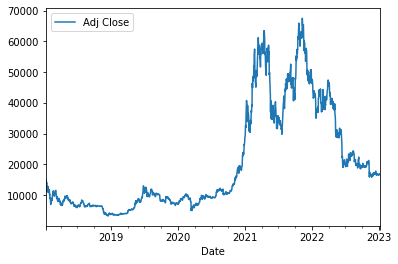

In [ ]:
badj_close.plot()

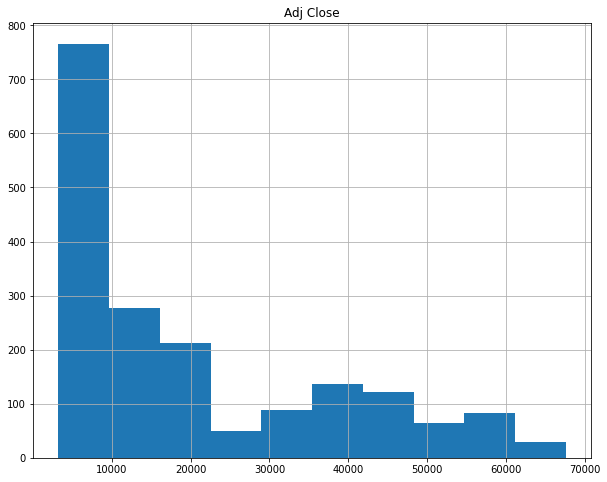

In [ ]:
adj_close.hist(figsize=(10,8));

In [ ]:
adj_close.columns

Index(['Adj Close'], dtype='object')

In [ ]:
#add date column
adj_close["Date"] = adj_close.index


<ipython-input-11-6bcc51233584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close["Date"] = adj_close.index


In [ ]:
adj_close.columns

Index(['Adj Close', 'Date'], dtype='object')

In [ ]:
#Lets try see if we have monthly seasonality in our data
#create the pivot table
pivot_table = adj_close.pivot_table(index=adj_close['Date'].dt.month, columns=adj_close['Date'].dt.year, values='Adj Close')
# display the pivot table
pivot_table

Date,2018,2019,2020,2021,2022,2023
Date,,,,,,
1,12282.445882,3701.554963,8389.270476,34761.649950,41114.422379,16817.819336
2,9472.001151,3711.907261,9630.722185,46306.798968,40763.474051,NaN
3,9040.557097,3976.069100,6871.016113,54998.008695,41966.237525,NaN
4,8033.596631,5178.469434,7224.477327,57206.720052,41435.319661,NaN
5,8450.997732,7309.694131,9263.151745,46443.286668,31706.105217,NaN
6,6793.507666,9415.900179,9489.227214,35845.154687,24383.685482,NaN
7,7146.349987,10669.336158,9589.899729,34444.973790,21539.253843,NaN
8,6700.129946,10643.248362,11652.394185,45709.022681,22366.266318,NaN
9,6610.675033,9814.067871,10660.276855,45939.771484,19804.779232,NaN


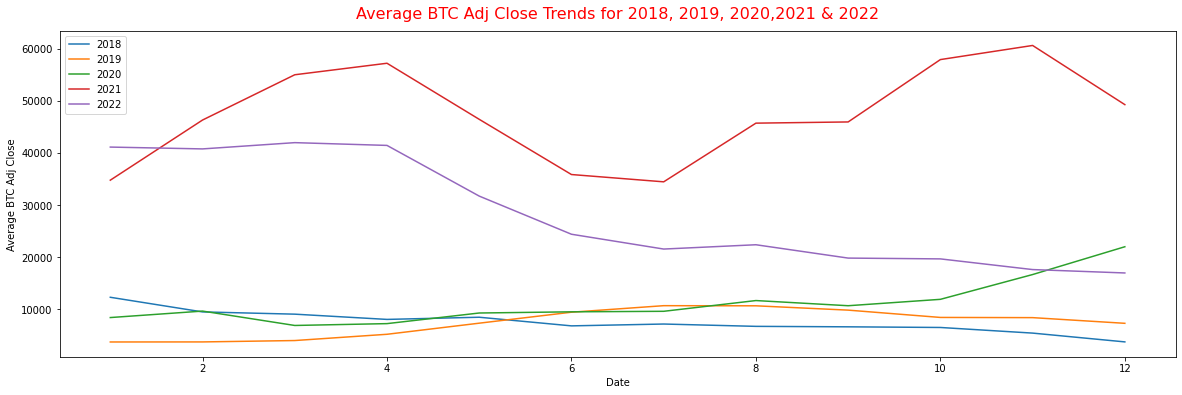

In [ ]:
# plot the average BTC Adj Close
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index, y=pivot_table[2018], ax=ax, label='2018')
sns.lineplot( x=pivot_table.index, y=pivot_table[2019], ax=ax, label='2019')
sns.lineplot( x=pivot_table.index, y=pivot_table[2020], ax=ax, label='2020')
sns.lineplot( x=pivot_table.index, y=pivot_table[2021], ax=ax, label='2021')
sns.lineplot( x=pivot_table.index, y=pivot_table[2022], ax=ax, label='2022')

plt.ylabel('Average BTC Adj Close')
plt.title('Average BTC Adj Close Trends for 2018, 2019, 2020,2021 & 2022', fontdict ={'fontsize':16,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
# Add a legend
plt.legend()
plt.show()

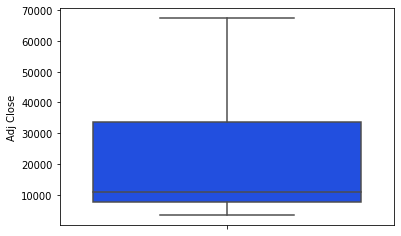

In [ ]:
#checking Outliers
sns.boxplot( y=adj_close["Adj Close"] );
plt.show()

In [ ]:
adj_close['Adj Close'].skew()

1.027476108443474

In [ ]:
adj_close['Adj Close'].kurtosis()


-0.2839920484105196

## Perform Root test(Ad fuller)

In [ ]:
X = adj_close['Adj Close']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.393117
p-value: 0.585571
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Detrending Using Varriable with Linear Regression

In [ ]:
# Detrend
timeTrend = np.linspace(1, len(adj_close['Adj Close']), len(adj_close['Adj Close']))
timeTrend = sm.add_constant(timeTrend)

# Fit OLS
model = sm.OLS(adj_close['Adj Close'], timeTrend)
fit_g = model.fit()
fit_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1347.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          2.38e-221
Time:                        10:33:43   Log-Likelihood:                -19882.
No. Observations:                1827   AIC:                         3.977e+04
Df Residuals:                    1825   BIC:                         3.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1168.8749    603.065      1.938      0.053     -13.896    2351.646
x1            20.9755      0.571     36.703      0.000      19.855      22.096
==============================================================================
Omnibus:                      156.620   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.832
Skew:                           0.793   Prob(JB):                     1.81e-43
Kurtosis:                       3.262   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

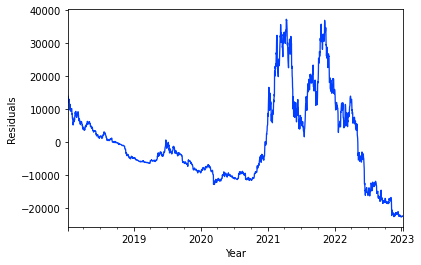

In [ ]:
# Plot residuals
btc_res = fit_g.resid
btc_res.plot(linewidth=1.3, xlabel="Year", ylabel="Residuals")
plt.show()

## Detrending using First Difference

In [ ]:
## Detrending using First Difference

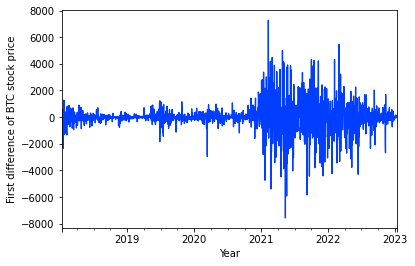

In [ ]:
# Plot First Difference of BTC Stock Price
btc_res.diff().plot(
    linewidth=1.3, xlabel="Year", ylabel="First difference of BTC stock price"
)
plt.show()

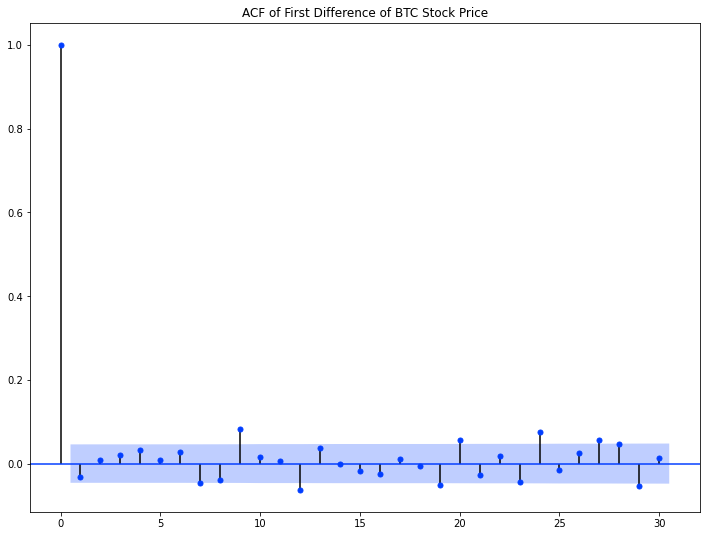

In [ ]:
# ACF of First Difference of BTC Stock Price
# (Note: [1:] as we need to skip first element since the model lost one data point)
fig, ax = plt.subplots(figsize=(12, 9))
sm.graphics.tsa.plot_acf(
    adj_close['Adj Close'].diff()[1:],
    title="ACF of First Difference of BTC Stock Price",
    lags=30,
    ax=ax,
)
plt.show()

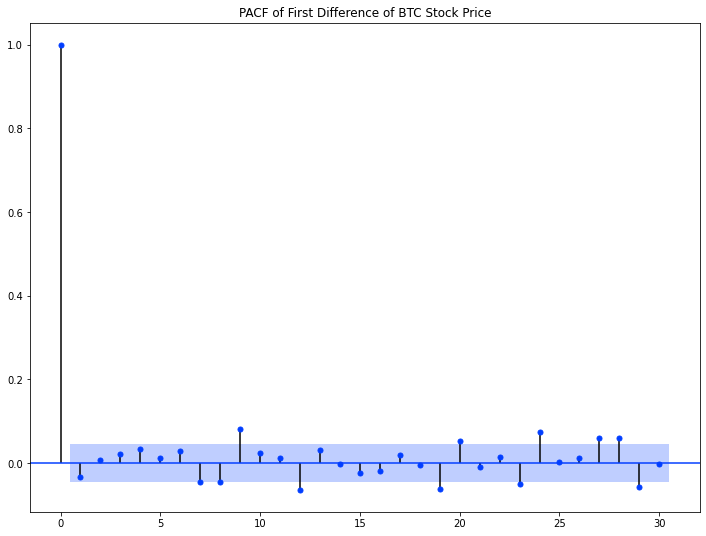

In [ ]:
# PACF of First Difference of BTC Stock Price
# (Note: [1:] as we need to skip first element since the model lost one data point)
fig, ax = plt.subplots(figsize=(12, 9))
sm.graphics.tsa.plot_pacf(
    adj_close['Adj Close'].diff()[1:],
    title="PACF of First Difference of BTC Stock Price",
    lags=30,
    ax=ax,
)
plt.show()

In [ ]:
# MA(1) for BTC stock
btc_ma1 = statsmodels.tsa.arima.model.ARIMA(adj_close['Adj Close'], order=(0, 0, 1)).fit()
print(btc_ma1.params)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const     2.034015e+04
ma.L1     9.581497e-01
sigma2    7.837579e+07
dtype: float64


In [ ]:
!pip install yfinance
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 11.7 MB/s eta 0:00:00


# Forcasting Volatility of ETH-USD using GARCH(1,1)



In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels
import statsmodels.api as sm
from arch import arch_model

In [ ]:
eth = yf.Ticker("ETH-USD").history(period="max")
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-04 00:00:00+00:00,1214.718628,1264.807495,1213.168823,1256.526611,6404416893,0.0,0.0
2023-01-05 00:00:00+00:00,1256.484619,1258.571533,1245.173096,1250.438599,4001786456,0.0,0.0
2023-01-06 00:00:00+00:00,1250.458984,1273.220337,1240.947510,1269.379028,4977252792,0.0,0.0


     lb_stat  lb_pvalue
5  12.510867    0.02842
p value < 0.05, null hypothesis rejected -> the return series has serial correlation


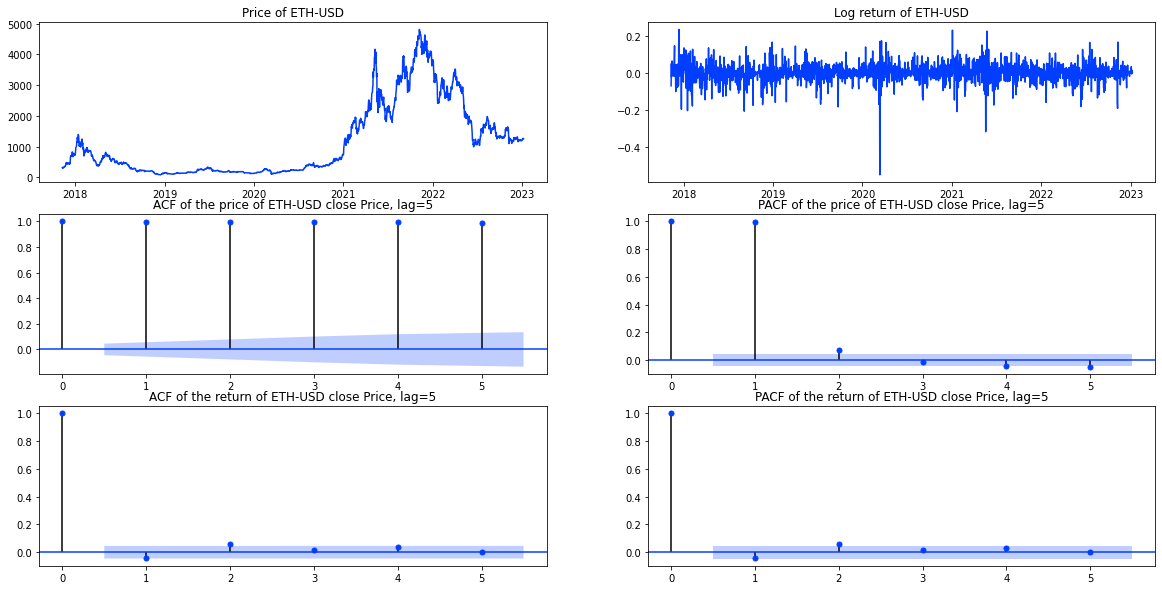

In [ ]:
def to_return(px):
  return np.log(px/px.shift(1)).dropna()

def explore_the_data(px_series):
  """
    Plot the following graphs
    - px series
    - log return series
    - ACF of return
    - PACF of return
    - run the Ljung-Box Test
  """

  fig = plt.figure(figsize=(20, 10))

  grid = fig.add_gridspec(3,2)
  px_plot = fig.add_subplot(grid[0, 0])
  rtn_plot = fig.add_subplot(grid[0, 1])
  px_acf_plot = fig.add_subplot(grid[1, 0])
  px_pacf_plot = fig.add_subplot(grid[1, 1])
  rtn_acf_plot = fig.add_subplot(grid[2, 0])
  rtn_pacf_plot = fig.add_subplot(grid[2, 1])


  px_plot.plot(px_series)
  px_plot.set(title="Price of ETH-USD")

  rtn = to_return(px_series)

  rtn_plot.plot(rtn)
  rtn_plot.set(title="Log return of ETH-USD")

  lag = 5 # 7 days

  sm.graphics.tsa.plot_acf(
      px_series,
      title=f"ACF of the price of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=px_acf_plot,
  )

  sm.graphics.tsa.plot_pacf(
      px_series,
      title=f"PACF of the price of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=px_pacf_plot,
  )


  sm.graphics.tsa.plot_acf(
      rtn,
      title=f"ACF of the return of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=rtn_acf_plot,
  )

  sm.graphics.tsa.plot_pacf(
      rtn,
      title=f"PACF of the return of ETH-USD close Price, lag={lag}",
      lags=lag,
      ax=rtn_pacf_plot,
  )

  result = sm.stats.acorr_ljungbox(rtn, lags=[lag], return_df=True)
  plt.savefig('exploration.png')
  print(result)

  significant_level = 0.05
  if(result["lb_pvalue"].item() < 0.05):
    print(f"p value < {significant_level}, null hypothesis rejected -> the return series has serial correlation")
  else:
    print(f"p value > {significant_level}, null hypothesis accepted -> No serial correlation in the return series")

explore_the_data(eth["Close"])

In [ ]:
# use GARCH(1, 1) to predict the time series, train: 2017-11-24 - 2021-12-31, test: 2022-01-01 - 2022-12-31
train_sdate = pd.to_datetime("2017-11-24 00:00:00", utc=True)
train_edate = pd.to_datetime("2021-12-31 23:59:59", utc=True)
test_sdate = pd.to_datetime("2022-01-01 00:00:00", utc=True)
test_edate = pd.to_datetime("2022-12-31 23:59:59", utc=True)

eth["close_px_rtn"] = to_return(eth["Close"])
eth = eth.dropna()

train = eth.loc[train_sdate:train_edate]
test = eth.loc[test_sdate:test_edate]

p = 1
q = 1
model = arch_model(train["close_px_rtn"] * 10, p = p, q = q, mean = 'AR', vol = 'GARCH', dist = 'StudentsT') # multiplier the return by 10 to disable the warning
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 40424.33988240923
Iteration:      2,   Func. Count:     17,   Neg. LLF: 20694.041073260792
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2609.3200336704294
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2052.348189011106
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1637.2660188197865
Iteration:      6,   Func. Count:     47,   Neg. LLF: 969.0681118556122
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1972.7996186213659
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1082.101173476819
Iteration:      9,   Func. Count:     69,   Neg. LLF: 998.1396802609564
Iteration:     10,   Func. Count:     77,   Neg. LLF: 966.850191516452
Iteration:     11,   Func. Count:     83,   Neg. LLF: 966.7999043753133
Iteration:     12,   Func. Count:     89,   Neg. LLF: 966.789965351714
Iteration:     13,   Func. Count:     95,   Neg. LLF: 966.7852687699503
Iteration:     14,   Func. Count:    101,   Neg. LLF: 966.7852

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                 close_px_rtn   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -966.785
Distribution:      Standardized Student's t   AIC:                           1943.57
Method:                  Maximum Likelihood   BIC:                           1970.13
                                              No. Observations:                 1499
Date:                      Sun, Jan 08 2023   Df Residuals:                     1498
Time:                              10:33:58   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0172  9.591e-03      1.790  7.344e-02 [-1.629e-03,3.597e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  6.862e-03      2.333  1.965e-02 [2.560e-03,2.946e-02]
alpha[1]       0.1256  3.646e-02      3.443  5.748e-04   [5.409e-02,  0.197]
beta[1]        0.8449  4.078e-02     20.716  2.475e-95     [  0.765,  0.925]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.3346      0.314     10.604  2.861e-26 [  2.718,  3.951]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# predict the volatility and compare to the test set
horizon = len(test)
print(f"prediction horizion: {horizon}")

pred = model_fit.forecast(reindex=False, horizon=horizon, method="simulation")
test['pred_close_px_rtn_vol'] = np.sqrt(pred.variance.values[0])

prediction horizion: 365


<ipython-input-29-fc5d7fbd18d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_close_px_rtn_vol'] = np.sqrt(pred.variance.values[0])


In [ ]:
test['close_px_rtn']

Date
2022-01-01 00:00:00+00:00    0.023367
2022-01-02 00:00:00+00:00    0.015757
2022-01-03 00:00:00+00:00   -0.017965
2022-01-04 00:00:00+00:00    0.008650
2022-01-05 00:00:00+00:00   -0.066379
                               ...   
2022-12-27 00:00:00+00:00   -0.011626
2022-12-28 00:00:00+00:00   -0.018983
2022-12-29 00:00:00+00:00    0.009709
2022-12-30 00:00:00+00:00   -0.001968
2022-12-31 00:00:00+00:00   -0.002055
Name: close_px_rtn, Length: 365, dtype: float64

In [ ]:
test['pred_close_px_rtn_vol']

Date
2022-01-01 00:00:00+00:00    0.426581
2022-01-02 00:00:00+00:00    0.435789
2022-01-03 00:00:00+00:00    0.444292
2022-01-04 00:00:00+00:00    0.451590
2022-01-05 00:00:00+00:00    0.461724
                               ...   
2022-12-27 00:00:00+00:00    0.643593
2022-12-28 00:00:00+00:00    0.648844
2022-12-29 00:00:00+00:00    0.645157
2022-12-30 00:00:00+00:00    0.650823
2022-12-31 00:00:00+00:00    0.653704
Name: pred_close_px_rtn_vol, Length: 365, dtype: float64

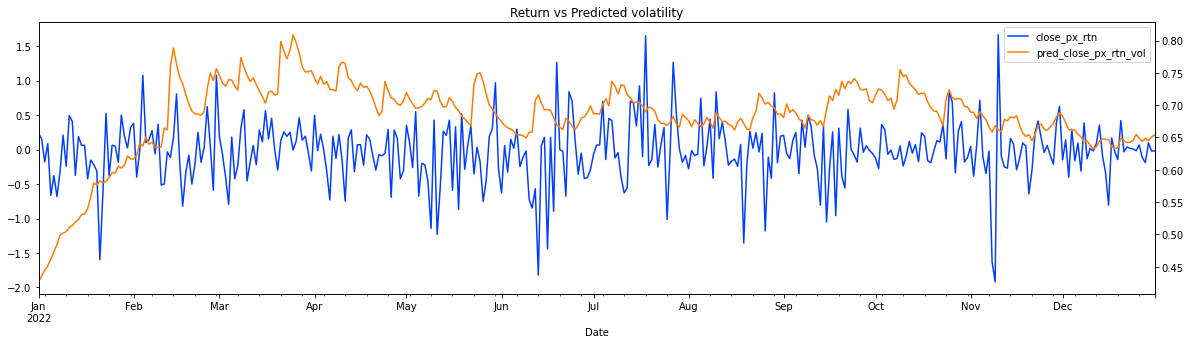

In [ ]:
df = pd.DataFrame()
df['close_px_rtn'] = test['close_px_rtn'].apply(lambda x: x * 10)
df['pred_close_px_rtn_vol'] = test['pred_close_px_rtn_vol']
df.plot(secondary_y=['pred_close_px_rtn_vol'], mark_right=False, figsize = (20,5), title="Return vs Predicted volatility").get_figure().savefig('rtn_vol.png')